<a href="https://colab.research.google.com/github/susanna-susanna/dau-python/blob/main/stpy_2_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Домашнее задание к лекции "Визуализация данных"

**Обязательная часть**
Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных.

Требования к анализу:

* построить не менее 4 визуализаций различных видов;
* каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
* по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте приложить ссылку на данные). Если идей нет, можете взять один из перечисленных ниже:

* данные приложений из Google Play;
* данные о видео из трендов YouTube;
* данные об уровне счастья в разных странах.


**Дополнительная часть (необязательная)**
* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

In [ ]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/susanna-susanna/dau-homeworks/main/Student_Behaviour.csv')

In [ ]:
df.head()

,"Have you completed any certification courses, or are you currently enrolled in any?",Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,possibility of choosing their career based on their degree :,social medai & video games spending Time,Travelling Time,Stress Level,Financial Status,Are you doing a part-time job right now?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   Have you completed any certification courses, or are you currently enrolled in any?  235 non-null    object 
 1   Gender                                                                               235 non-null    object 
 2   Department                                                                           235 non-null    object 
 3   Height(CM)                                                                           235 non-null    float64
 4   Weight(KG)                                                                           235 non-null    float64
 5   10th Mark                                                                            235 non

In [ ]:
#Изучим столбцов. Вижу, что в некоторых столбцах лишние пробелы. Это знание поможет в работе с датасетом.
df.columns

Index(['Have you completed any certification courses, or are you currently enrolled in any?',
       'Gender', 'Department', 'Height(CM)', 'Weight(KG)', '10th Mark',
       '12th Mark', 'college mark', 'hobbies', 'daily studing time',
       'prefer to study in', 'salary expectation', 'Do you like your degree?',
       'possibility of choosing  their career based on their degree : ',
       'social medai & video games spending Time', 'Travelling Time ',
       'Stress Level ', 'Financial Status',
       'Are you doing a part-time job right now?'],
      dtype='object')

In [ ]:
# сравним показатели оценок по классам и колледжам среди мужчин и женщин
comparison_mark = df[['Gender', '10th Mark', '12th Mark', 'college mark']].groupby('Gender').mean()
comparison_mark

,10th Mark,12th Mark,college mark
Gender,,,
Female,78.974684,71.715190,76.870886
Male,75.762179,67.293782,67.515577


In [ ]:
comparison_mark.loc['Female'].values

array([78.97468354, 71.71518987, 76.87088608])

In [ ]:
comparison_mark.columns.values

array(['10th Mark', '12th Mark', 'college mark'], dtype=object)

In [ ]:
len(comparison_mark.loc['Female'])

3

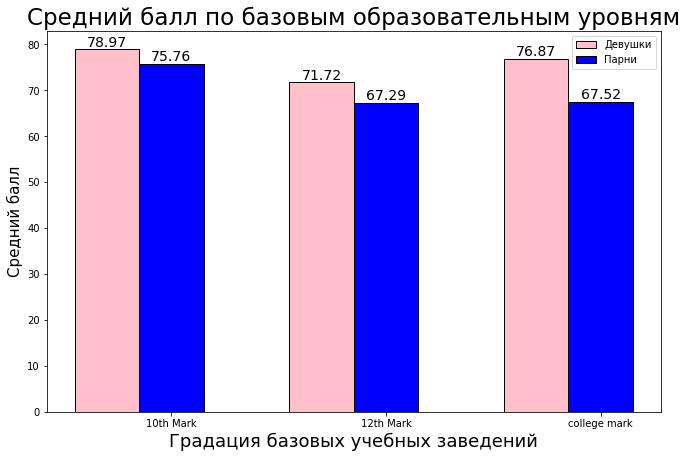

In [ ]:
# https://www.python-graph-gallery.com/8-add-confidence-interval-on-barplot
import matplotlib.patches as patches

# width of the bars
barWidth = 0.3

# Choose the height of the pink bars
bar1 = comparison_mark.loc['Female'].values
bar1

# Choose the height of the blue bars
bar2 = comparison_mark.loc['Male'].values
bar2

# The x position of bars
r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]

# Create blue bars
plt.bar(r1, bar1, width = barWidth, color = 'pink', edgecolor = 'black', capsize=7, label='Девушки')
 
# Create cyan bars
plt.bar(r2, bar2, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='Парни')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bar1))], comparison_mark.columns.values)
plt.ylabel('Средний балл', size=15)
plt.legend()
plt.title('Средний балл по базовым образовательным уровням', size=23)
plt.xlabel('Градация базовых учебных заведений', size=18)

# Вот этот цикл добавляет подписи к столбцам.
# нет встроенного метода, поэтому добавляем циклом. Девочкам
for f, val in enumerate(bar1):
    plt.text(f, val, round(float(val), 2), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

# plt.tick_params(left=False) #Так и не поняла, что это за параметр и для чего он нужен?)))

# Парням
for m, val in enumerate(bar2):
    plt.text(m + barWidth, val, round(float(val), 2), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})
    
# plt.tick_params(right=False) 
 
# Show graphic
# plt.show() Вспомнила, что это необходимо для других IDE, кроме ноутбука))

Деовчки на всех этапах стараются получить более высокую оценку. Не путать с "более умнее") Мальчики иногда стесняются получать высокую оценку, чтоб не слыть ботаном. Плюс девочки более коммуникабельнее и не стесняются общаться с преподавателями на предмет повышения своих оценок. Мальчики же в этом возрасте не уверены в себе для таких коммуникаций.


В старших классах средняя падает у всех. 
Причин может быть:
* немного устали и немного потеряли мотивацию
* дети сосредоточены не на получении оценки, а больше времени тратят на подготовительные экзамены в ВУЗы

Однако в школах не сильна разница между девочками и мальчиками.
В колледже средняя между полами уже меняется. 
Возможно, мальчики не так сильно могут оценить ценность хороших оценок (не видят большой пользы от хороших оценок)
Возможно, мальчики не боятся низких оценок в колледже, потому что не ставят себе амбициозных целей.
Возможно, мальчики начинают подрабатывать, и у них меньше времени и сил на уделение должного винмания учёбе.

In [ ]:
# посмотрим, есть ли зависимость от затрачиваемого времени на каждодневное обучение и получением хороших оценок
marks = df[['Gender','10th Mark', '12th Mark', 'college mark', 'daily studing time']]
marks

,Gender,10th Mark,12th Mark,college mark,daily studing time
0,Male,79.0,65.0,80.0,0 - 30 minute
1,Female,70.0,80.0,70.0,30 - 60 minute
2,Male,69.5,61.0,55.0,1 - 2 Hour
3,Female,70.0,59.0,58.0,1 - 2 Hour
4,Male,40.0,65.0,30.0,30 - 60 minute
...,...,...,...,...,...
230,Male,72.0,67.0,65.0,30 - 60 minute
231,Male,72.0,70.0,76.0,2 - 3 hour
232,Female,90.0,75.0,70.0,30 - 60 minute
233,Female,85.0,74.0,75.0,0 - 30 minute


In [ ]:
marks['daily studing time'].value_counts()

30 - 60 minute      81
1 - 2 Hour          61
0 - 30 minute       46
2 - 3 hour          24
3 - 4 hour          15
More Than 4 hour     8
Name: daily studing time, dtype: int64

In [ ]:
def order_filter(row):
    """Фильтрует строки по следующим правилам:
        смотрит на затраченное время
        и нумерует по возврастанию
        """
    daily_studing_time = row['daily studing time']

    
    if daily_studing_time == '0 - 30 minute':
        return '01. less than 30 minutes'
    elif daily_studing_time == '30 - 60 minute':
        return '02. 30 - 60 minute'
    elif daily_studing_time == '1 - 2 Hour':
        return '03. 1 - 2 hour'
    elif daily_studing_time == '2 - 3 hour':
        return '04. 2 - 3 hour'
    elif daily_studing_time == '3 - 4 hour':
        return '05. 3 - 4 hour'
    elif daily_studing_time == 'More Than 4 hour':
        return '06. more than 4 hour'

    return daily_studing_time

In [ ]:
marks['studing_time'] = marks.apply(order_filter, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
marks

,Gender,10th Mark,12th Mark,college mark,daily studing time,studing_time
0,Male,79.0,65.0,80.0,0 - 30 minute,01. less than 30 minutes
1,Female,70.0,80.0,70.0,30 - 60 minute,02. 30 - 60 minute
2,Male,69.5,61.0,55.0,1 - 2 Hour,03. 1 - 2 hour
3,Female,70.0,59.0,58.0,1 - 2 Hour,03. 1 - 2 hour
4,Male,40.0,65.0,30.0,30 - 60 minute,02. 30 - 60 minute
...,...,...,...,...,...,...
230,Male,72.0,67.0,65.0,30 - 60 minute,02. 30 - 60 minute
231,Male,72.0,70.0,76.0,2 - 3 hour,04. 2 - 3 hour
232,Female,90.0,75.0,70.0,30 - 60 minute,02. 30 - 60 minute
233,Female,85.0,74.0,75.0,0 - 30 minute,01. less than 30 minutes


In [ ]:
marks.groupby('studing_time').mean()

,10th Mark,12th Mark,college mark
studing_time,,,
01. less than 30 minutes,74.180435,66.133913,68.690435
02. 30 - 60 minute,77.197531,68.928025,69.864198
03. 1 - 2 hour,77.906557,70.085246,70.317541
04. 2 - 3 hour,77.804167,68.366667,75.929167
05. 3 - 4 hour,77.653333,68.333333,75.520000
06. more than 4 hour,76.025000,74.625000,67.750000


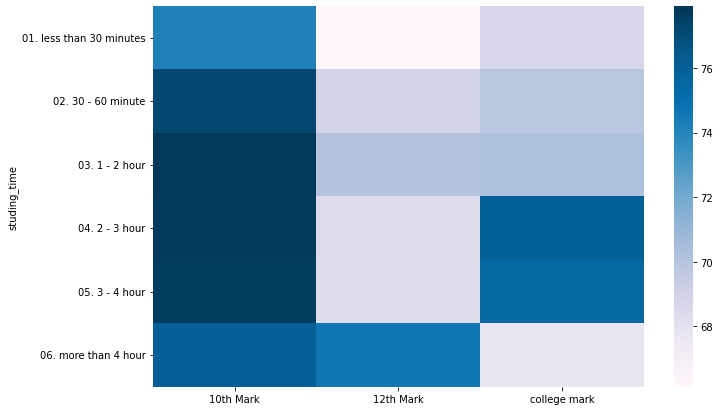

In [ ]:
sns.heatmap(marks.groupby('studing_time').mean(), cmap='PuBu')

В школе дети уделяют обучению время по-разному. Диапазон от меньше 30 минут до более 4 часов. Те, кто получает более высокие оценки, уделяют обучению от 1 до 4 часов в день.

Для получения высоких оценок уже в старших классах дети уже уделяют более 4 часов.

В колледже тоже определён оптимальный интервал времени, который помогает полоучать высокие оценки -- 2-4 часа в день

Обдумать вариант "Не верят в хорошую карьеру": добавить столбец ожидания карьеры и подумать, мб не верят в хорошую карьеру, поэтому плохо учатся

In [ ]:
femi = df.loc[df['Gender'] == 'Female']

male = df.loc[df['Gender'] == 'Male']

In [ ]:
femi.head(2)

,"Have you completed any certification courses, or are you currently enrolled in any?",Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,possibility of choosing their career based on their degree :,social medai & video games spending Time,Travelling Time,Stress Level,Financial Status,Are you doing a part-time job right now?
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No


In [ ]:
femi['10th Mark'][:5]

1     70.0
3     70.0
5     90.0
11    60.0
12    59.0
Name: 10th Mark, dtype: float64

In [ ]:
femi['Travelling Time ']

1       0 - 30 minutes
3       0 - 30 minutes
5       0 - 30 minutes
11       2 - 2.30 hour
12     30 - 60 minutes
            ...       
226    30 - 60 minutes
229     0 - 30 minutes
232      2.30 - 3 hour
233      2.30 - 3 hour
234      2.30 - 3 hour
Name: Travelling Time , Length: 79, dtype: object

In [ ]:
femi['prefer to study in']

1      Morning
3      Anytime
5        Night
11       Night
12     Morning
        ...   
226      Night
229    Anytime
232      Night
233    Anytime
234      Night
Name: prefer to study in, Length: 79, dtype: object

In [ ]:
male['salary expectation']

0      40000
2      13000
4      50000
6      15000
7      25000
       ...  
223    16000
227    17000
228      500
230     7000
231    25000
Name: salary expectation, Length: 156, dtype: int64

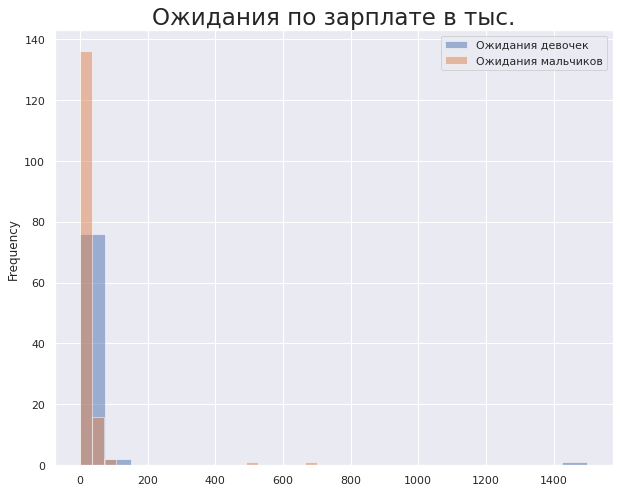

In [ ]:
(femi['salary expectation']/1000).plot(kind='hist', 
                     alpha = 0.5,
                     bins=20,
                     label='Ожидания девочек')
                    #  density = True)

(male['salary expectation']/1000).plot(kind='hist', 
                     alpha = 0.5,
                     bins=20,
                     label='Ожидания мальчиков')
                    #  density = True)

plt.title('Ожидания по зарплате в тыс.', size=23)
plt.legend()

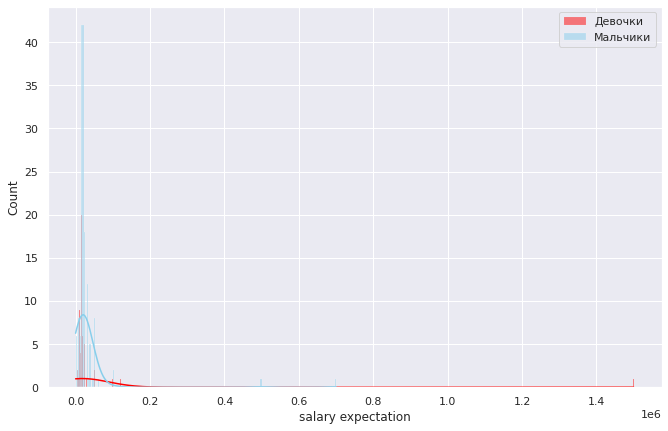

In [ ]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
# df = sns.load_dataset("iris")

sns.histplot(data=femi, x=femi['salary expectation'], color="red", label="Девочки", kde=True)
sns.histplot(data=male, x=male['salary expectation'], color="skyblue", label="Мальчики", kde=True)

# # figure size in inches
rcParams['figure.figsize'] = 10, 8 #Что-то я так и не поняла, как нстроить размеры

plt.legend() 
plt.show()

In [ ]:
print("Максимум по ожиданиям по всей выборке ", df['salary expectation'].max())
print("Среднее по ожиданиям по всей выборке ", df['salary expectation'].mean())
print("Максимум по ожиданиям среди девочек ", femi['salary expectation'].max())
print("Среднее по ожиданиям среди девочек ", femi['salary expectation'].mean())
print("Максимум по ожиданиям среди мальчиков ", male['salary expectation'].max())
print("Среднее по ожиданиям среди мальчиков ", male['salary expectation'].mean())
print('--------------------')
print("Мода по ожиданиям по всей выборке ", df['salary expectation'].mode())
print("Медиан по ожиданиям по всей выборке ", df['salary expectation'].median())
print("Мода по ожиданиям среди девочек ", femi['salary expectation'].mode())
print("Медиан по ожиданиям среди девочек ", femi['salary expectation'].median())
print("Мода по ожиданиям среди мальчиков ", male['salary expectation'].mode())
print("Медиан по ожиданиям среди мальчиков ", male['salary expectation'].median())

Максимум по ожиданиям по всей выборке  1500000
Среднее по ожиданиям по всей выборке  32481.68085106383
Максимум по ожиданиям среди девочек  1500000
Среднее по ожиданиям среди девочек  38165.0
Максимум по ожиданиям среди мальчиков  700000
Среднее по ожиданиям среди мальчиков  29603.589743589742
--------------------
Мода по ожиданиям по всей выборке  0    20000
dtype: int64
Медиан по ожиданиям по всей выборке  20000.0
Мода по ожиданиям среди девочек  0    20000
dtype: int64
Медиан по ожиданиям среди девочек  17000.0
Мода по ожиданиям среди мальчиков  0    20000
dtype: int64
Медиан по ожиданиям среди мальчиков  20000.0


##Вывод
Девочки настроены  зарабатывать суммы, выше, чем планируют зарабатывать мальчики. Очень маленькие группки (Если не единичные случаи) мальчиков настроены зарабатывать среднее по выборке. И есть девочки, которые собираются зарабывать несоразмеримо больше всех остальных из опршенных. Так?))

Больше я ничего не понимаю в гистограммах.
Буду очень признательна, если вы поможете мне понять, что я тут вижу. То, что дети не рассчитывают получать высокие з/п. И чаще всего называют суммы близкие к низкой зарплате? Или что?
И не могу нагуглить что-то, где на пальцах объясняют, как правильно читать эти гистограммы. Вижу, они часто используются, поэтому очень бы хотелось научиться понимать их

In [ ]:
df.head(2)

,"Have you completed any certification courses, or are you currently enrolled in any?",Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,possibility of choosing their career based on their degree :,social medai & video games spending Time,Travelling Time,Stress Level,Financial Status,Are you doing a part-time job right now?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No


Сравним набор увлечений среди мальчиков и девочек

In [ ]:
femi_trav_hobbies = df.loc[df['Gender'] == 'Female']['hobbies']

male_trav_hobbies = df.loc[df['Gender'] == 'Male']['hobbies']

In [ ]:
femi_trav_hobbies.unique()

# НЕ подходит! выводит не в том порядке, который мне нужен!
# Он выводит по алфавитному порядку, а мне нужен порядок, привзанный к порядку значений

array(['Cinema', 'Reading books', 'Sports', 'Video Games'], dtype=object)

In [ ]:
femi_trav_hobbies.value_counts().index

# То, что надо))

Index(['Cinema', 'Sports', 'Reading books', 'Video Games'], dtype='object')

In [ ]:
femi_trav_hobbies.value_counts()

Cinema           35
Sports           23
Reading books    18
Video Games       3
Name: hobbies, dtype: int64

In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, 'Увлечения девочек')

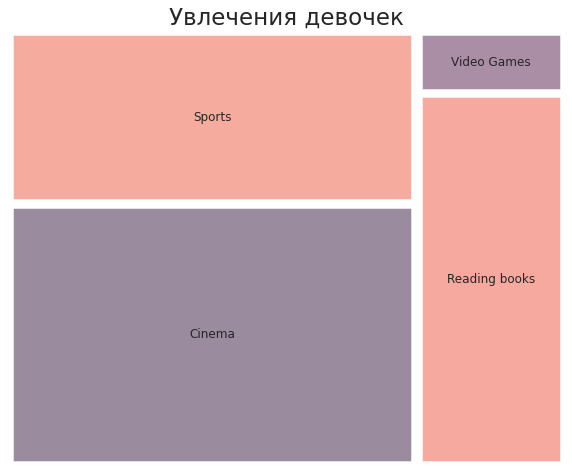

In [ ]:
# libraries
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
import pandas as pd

# Create a data frame with fake data
# Эту запись оставила, чтоб помнить как создавать на ходу)
# df = pd.DataFrame({'количество упоминаний':femi_trav_hobbies.value_counts(), 'хобби':femi_trav_hobbies.value_counts().index })

# plot it
# squarify.plot(sizes=df['количество упоминаний'], label=df['хобби'], alpha=.1 )

# plot it
squarify.plot(sizes=femi_trav_hobbies.value_counts(), label=femi_trav_hobbies.value_counts().index, alpha=.5, pad = True )
plt.axis('off')
# plt.show()
plt.title('Увлечения девочек',size=23)

Text(0.5, 1.0, 'Увлечения мальчиков')

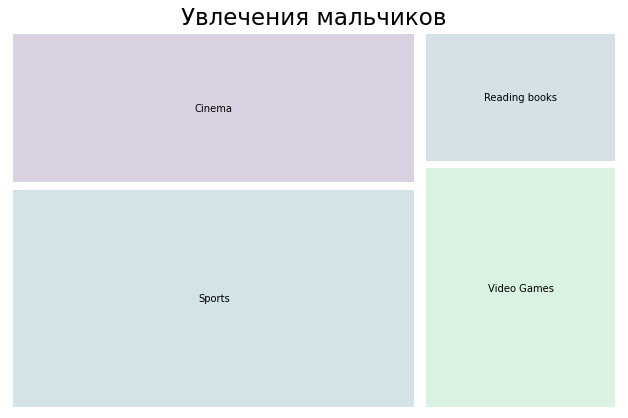

In [ ]:
squarify.plot(sizes=male_trav_hobbies.value_counts(), label=male_trav_hobbies.value_counts().index, alpha=.2, pad = True )
plt.axis('off')
plt.title('Увлечения мальчиков',size=23)

По увлечениям видно, что мальчики больше любят и больше занимаются спортом, чем девочки. Спорт -- фаворит развлечений у мальчиков.
Девочки читают больше мальчиков.
И что явно бросается в глаза -- девочки много реже мальчиков играют в видеоигры.

**Вывод**: несмотря на увлечения спортом, что вызывает выработку здорового дофамина, мальчики более склонны к зависимости(ям), вызывающим выработку нездорового дофамина.
Очень печально.  Хотя не стоит исключать тот факт, что девочки давали "правильные" ответы и не были так откровенны, как мальчики (которые по природе общаются без задних мыслей)))

In [ ]:
a = pd.DataFrame(df['salary expectation'])
a['Gender'] = 'both'
a.head(2)

,salary expectation,Gender
0,40000,both
1,15000,both


In [ ]:
cols = a.columns.tolist()
cols

['salary expectation', 'Gender']

In [ ]:
cols = cols[-1:] + cols[:-1]
cols

['Gender', 'salary expectation']

In [ ]:
a = a[cols]
a.head(2)

,Gender,salary expectation
0,both,40000
1,both,15000


In [ ]:
df_box = a.append(male[['Gender', 'salary expectation']]).append(femi[['Gender', 'salary expectation']])
df_box.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 234
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              470 non-null    object
 1   salary expectation  470 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.0+ KB


Text(0.5, 1.0, 'Boxplot-ы по ожиданиям зарплат')

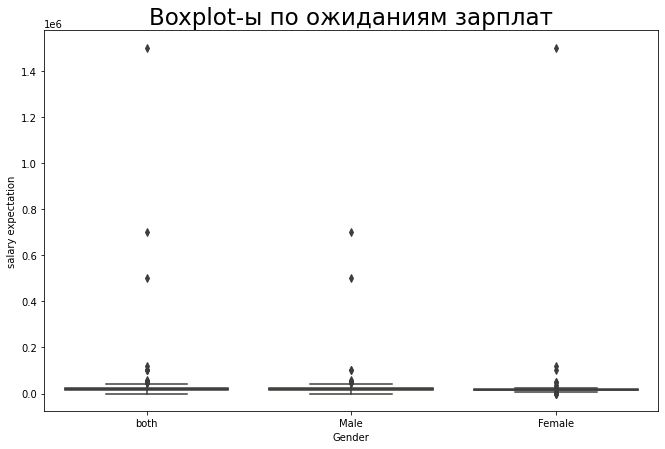

In [ ]:
# # Usual boxplot
sns.boxplot(x='Gender', y='salary expectation', data=df_box)
plt.title('Boxplot-ы по ожиданиям зарплат', size=23)

Не очень удобно читать таике боксплоты.

В боксплотах нужно убрать выбросы (просто ограничив ось) при помощи функции ylim, т.к. сейчас они не очень хорошо читаются именно из-за них.

(0.0, 60000.0)

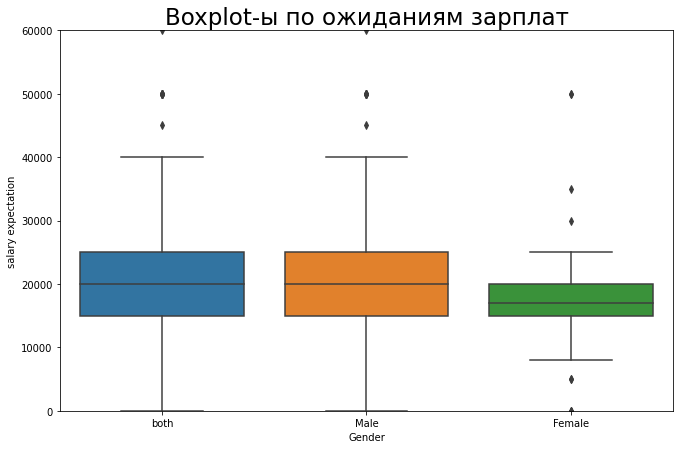

In [ ]:
# # Usual boxplot
sns.boxplot(x='Gender', y='salary expectation', data=df_box)
plt.title('Boxplot-ы по ожиданиям зарплат', size=23)

plt.ylim(0, 0.06e6) #1e6 взяла из визуализации сверху

In [ ]:
# Попробуем продвинутутю визуализацию
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go


data = []

for sex in df_box.Gender.unique():
    data.append(
        go.Box(y=df_box[df_box.Gender==sex]['salary expectation'], 
               name=sex)
    )
iplot(data, show_link = False)

# Не смогла сделать название для этой визуализации
# И не смогла обрезать ось Y, как на предыдущей визуализации

Межквартильный размах у мальчиков шире, чем у девочек.
У мальчиков выбросы не так далеки от третьей квантили. И более-менее равномерны.

У девочек межвартильный размах у́же. Выбросы неравномерны: часть близко расположена к третьей квантили, часть много далеки от 3 квантили.


Сразу видно, что опрашивались подростки) С одной стороны дети очень неуверены в себе, с другой стороны есть слишком уверенные в себе. 
Возможно, в общем: девочки более уверены в заработке, хоть каком (у них нет нуля в мининмуме)

##Полезные материалы
[Colab с занятия (31)](https://colab.research.google.com/drive/1N540vhlhVN-fUDjFzGndd6VNx3uDldzr) 

[Colab с занятия (32)](https://colab.research.google.com/drive/1du8T0Vx4PrhFPtOb2fXW4gyqNL4BM6Hs)

[Сделать список из значений столбца](https://python.ivan-shamaev.ru/pandas-series-and-dataframe-objects-build-index/)

[Отфильтровать нужные строки](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)

[Python Graph Gallery](https://www.python-graph-gallery.com/8-add-confidence-interval-on-barplot)

https://www.python-graph-gallery.com/25-histogram-with-several-variables-seaborn

[5 простых способов визуализации данных на Python](https://medium.com/nuances-of-programming/5-%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%8B%D1%85-%D1%81%D0%BF%D0%BE%D1%81%D0%BE%D0%B1%D0%BE%D0%B2-%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8-%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85-%D0%BD%D0%B0-python-%D1%81-%D0%BA%D0%BE%D0%B4%D0%BE%D0%BC-e0053808c83d)

[Гистограмма распределения в EXCEL](https://excel2.ru/articles/gistogramma-raspredeleniya-v-ms-excel)

[Подобрать нужный цвет, чтоб не вырви глаз](https://fcpython.com/visualisation/python-treemaps-squarify-matplotlib)

[Hidden Data Under Boxplot](https://www.python-graph-gallery.com/39-hidden-data-under-boxplot)

[Поменять порядок столбцов в ДФ](https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns)

[Setting the Font, Title, Legend Entries, and Axis Titles in Python](https://plotly.com/python/figure-labels/)

[Title alignment in Plotly](https://www.geeksforgeeks.org/title-alignment-in-plotly/)

[Как читать гистограммы](https://www.wikihow.com/Read-Histograms)

[Примеры кода в plotly](https://plotly.com/python/figure-labels/)

[Colab с домашкой](https://colab.research.google.com/drive/1VvXV9c1bkm7u08nS0NDdfF8BvHjFboPJ#scrollTo=KtdiBxgFg1rF)

[Python Graph Gallery. Treemap](https://www.python-graph-gallery.com/treemap/)

Для подписи значений на столбчатом графике можно использовать функцию bar_label, примеры использования здесь: www.geeksforgeeks.org...n-barplot/

Иногда могут возникать ошибки при построении гистограммы именно из-за того, что обращаются к столбцам, которые содержат не числовые, а строковые значения, на таких данных построить гистограмму нельзя. Как читать гистограммы - вот здесь наглядный материал: www.wikihow.com...Histograms